In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Find best values

In [3]:
methods_df = pd.read_json("./outputs/full_results.jsonl", orient="records", lines=True) 

In [4]:
columns = list(methods_df.columns)
columns.remove("mutation.method")
columns.remove("repeats")
columns.remove("filename")
columns.remove("timesteps")
columns.remove("population_size")
columns.remove("minimums")
columns.remove("means")
columns.remove("maximums")
columns.remove("selection.percent")
columns_to_group_by = columns.copy()
columns_to_group_by.remove("best_value")

In [5]:
groups = methods_df[columns].groupby(columns_to_group_by).median()
groups = groups.reset_index(drop=False)
groups.head(n=2)

,mutation.prob,mutation.sigma,crossover.method,crossover.prob,selection.method,function,best_value
0,0.1,0.1,mean,0.5,elitist15,parabolid3D,-0.000156
1,0.1,0.1,mean,0.5,elitist15,rastrigin10D,202.507419


In [6]:
groups[groups["function"] == "parabolid3D"].sort_values(by = "best_value", ascending=False)

,mutation.prob,mutation.sigma,crossover.method,crossover.prob,selection.method,function,best_value
306,0.3,0.1,mean,0.9,elitist30,parabolid3D,-1.140000e-08
308,0.3,0.1,mean,0.9,fittest,parabolid3D,-1.375000e-08
162,0.2,0.1,mean,0.9,elitist30,parabolid3D,-1.615000e-08
354,0.3,0.2,mean,0.9,elitist30,parabolid3D,-1.760000e-08
258,0.2,0.3,mean,0.9,elitist30,parabolid3D,-2.195000e-08
...,...,...,...,...,...,...,...
110,0.1,0.3,mean,0.7,roulette,parabolid3D,-1.488101e-03
286,0.2,0.3,pointwise,0.9,roulette,parabolid3D,-1.490232e-03
102,0.1,0.3,mean,0.5,roulette,parabolid3D,-1.718908e-03
422,0.3,0.3,pointwise,0.7,roulette,parabolid3D,-2.008264e-03


In [7]:
rows = groups[groups["function"] == "rastrigin10D"].sort_values(by = "best_value", ascending=False)
rows

,mutation.prob,mutation.sigma,crossover.method,crossover.prob,selection.method,function,best_value
139,0.1,0.3,pointwise,0.9,elitist30,rastrigin10D,214.792271
141,0.1,0.3,pointwise,0.9,fittest,rastrigin10D,214.712106
285,0.2,0.3,pointwise,0.9,fittest,rastrigin10D,214.630720
427,0.3,0.3,pointwise,0.9,elitist30,rastrigin10D,214.169719
283,0.2,0.3,pointwise,0.9,elitist30,rastrigin10D,214.035332
...,...,...,...,...,...,...,...
223,0.2,0.2,pointwise,0.5,roulette,rastrigin10D,200.894645
375,0.3,0.2,pointwise,0.7,roulette,rastrigin10D,200.808363
367,0.3,0.2,pointwise,0.5,roulette,rastrigin10D,200.574476
383,0.3,0.2,pointwise,0.9,roulette,rastrigin10D,200.558511


In [8]:
def multisearch(df: pd.DataFrame, kv: dict):
    global_mask = None
    for key, value in kv.items():
        if global_mask is None:
            global_mask = df[key] == value
        else:
            global_mask &= (df[key] == value)
    return df[global_mask]

In [9]:
def indexed_explode(df: pd.DataFrame, by: str, index_colname: str = "rank"):
    assert by in df.columns

    tempdf = df[[by]].copy()
    tempdf["__temp"] = range(len(tempdf))
    tempdf = tempdf.explode(by)

    newdf = df.explode(by)
    newdf[index_colname] = tempdf.groupby(by="__temp").cumcount()

    return newdf

In [10]:
best_row = rows.iloc[0, :]
search_dict = best_row.to_dict()
search_dict.pop("best_value")
df = multisearch(methods_df, search_dict).reset_index(drop=True)

In [11]:
import seaborn as sns

Text(0.5, 0, 'Epoka')

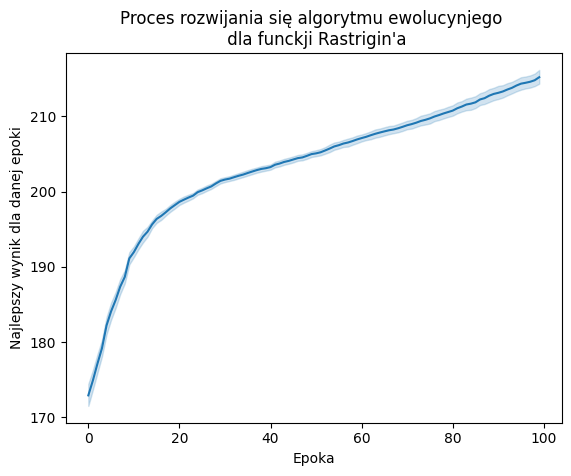

In [13]:
plot_df = indexed_explode(df[["maximums"]], "maximums", index_colname="timestep")

# Plot the responses for different events and regions
sns.lineplot(x="timestep", y="maximums", data = plot_df)
plt.title("Proces rozwijania się algorytmu ewolucynjego \n dla funckji Rastrigin'a")
plt.ylabel("Najlepszy wynik dla danej epoki")
plt.xlabel("Epoka")